# Robustness Eval by Masking Gene Expressions

The basic idea to evaluate robustness by masking X% gene expression and compare the zero-shot tasks (batch integration & cell type labeling) results.

## Step 2: Comparison
In this section, we compare clustering metrics (e.g., ASW_label, ASW_batch, etc.) after masking different percentages of gene expression, to provide a clear understanding of the foundation model’s robustness.

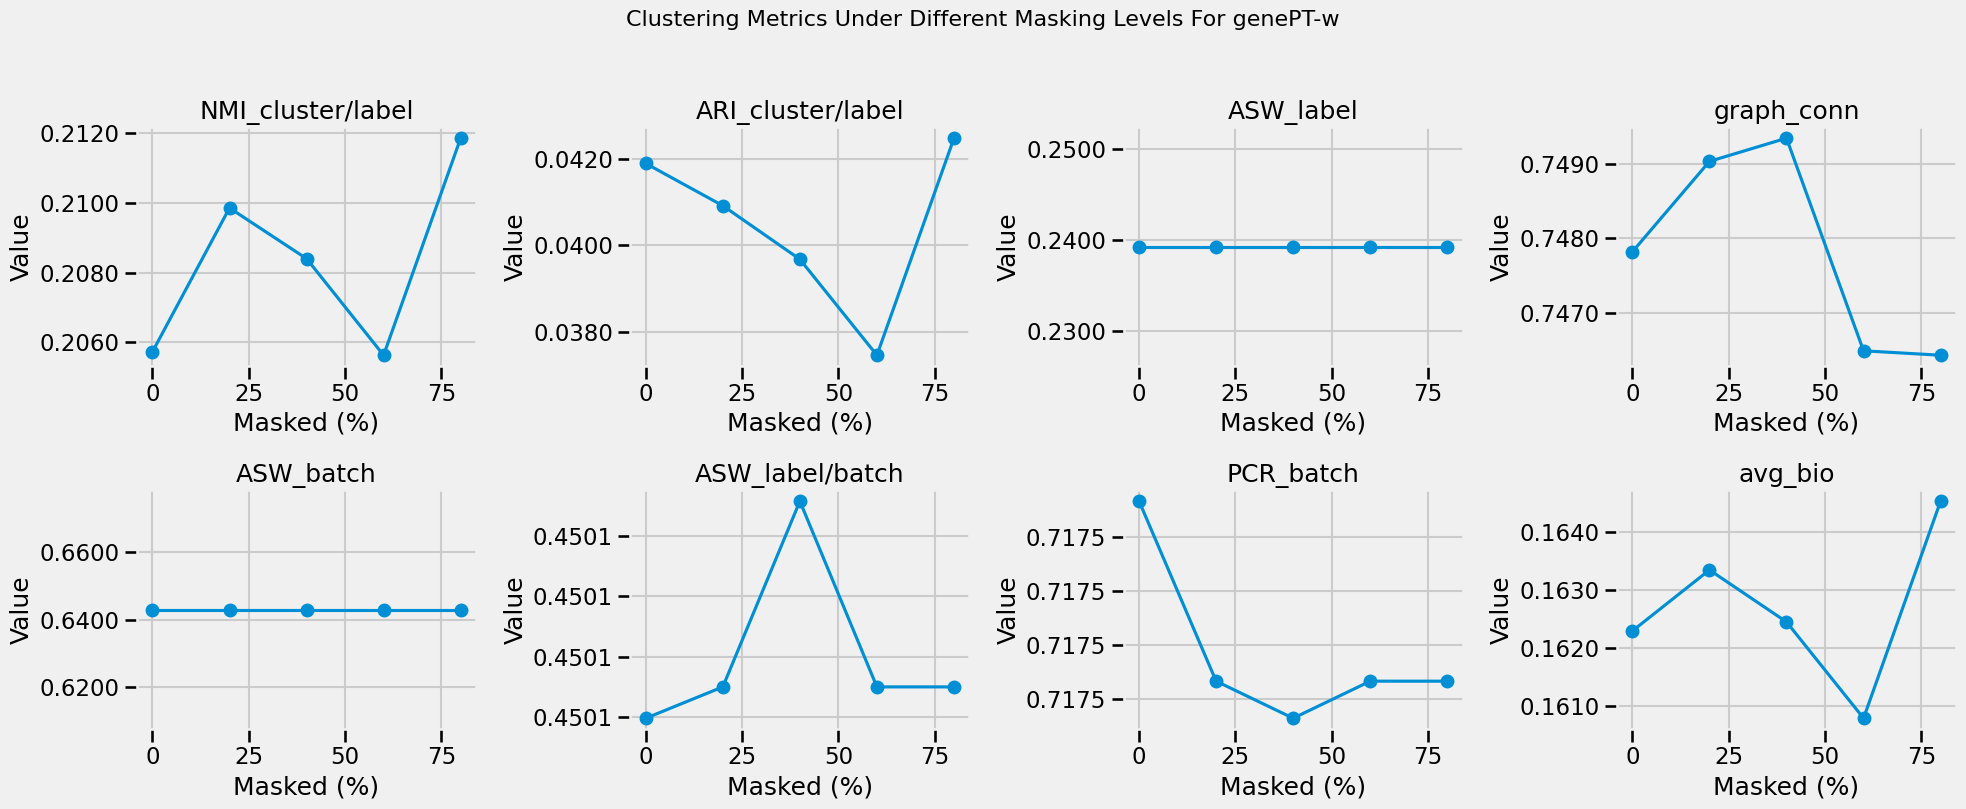

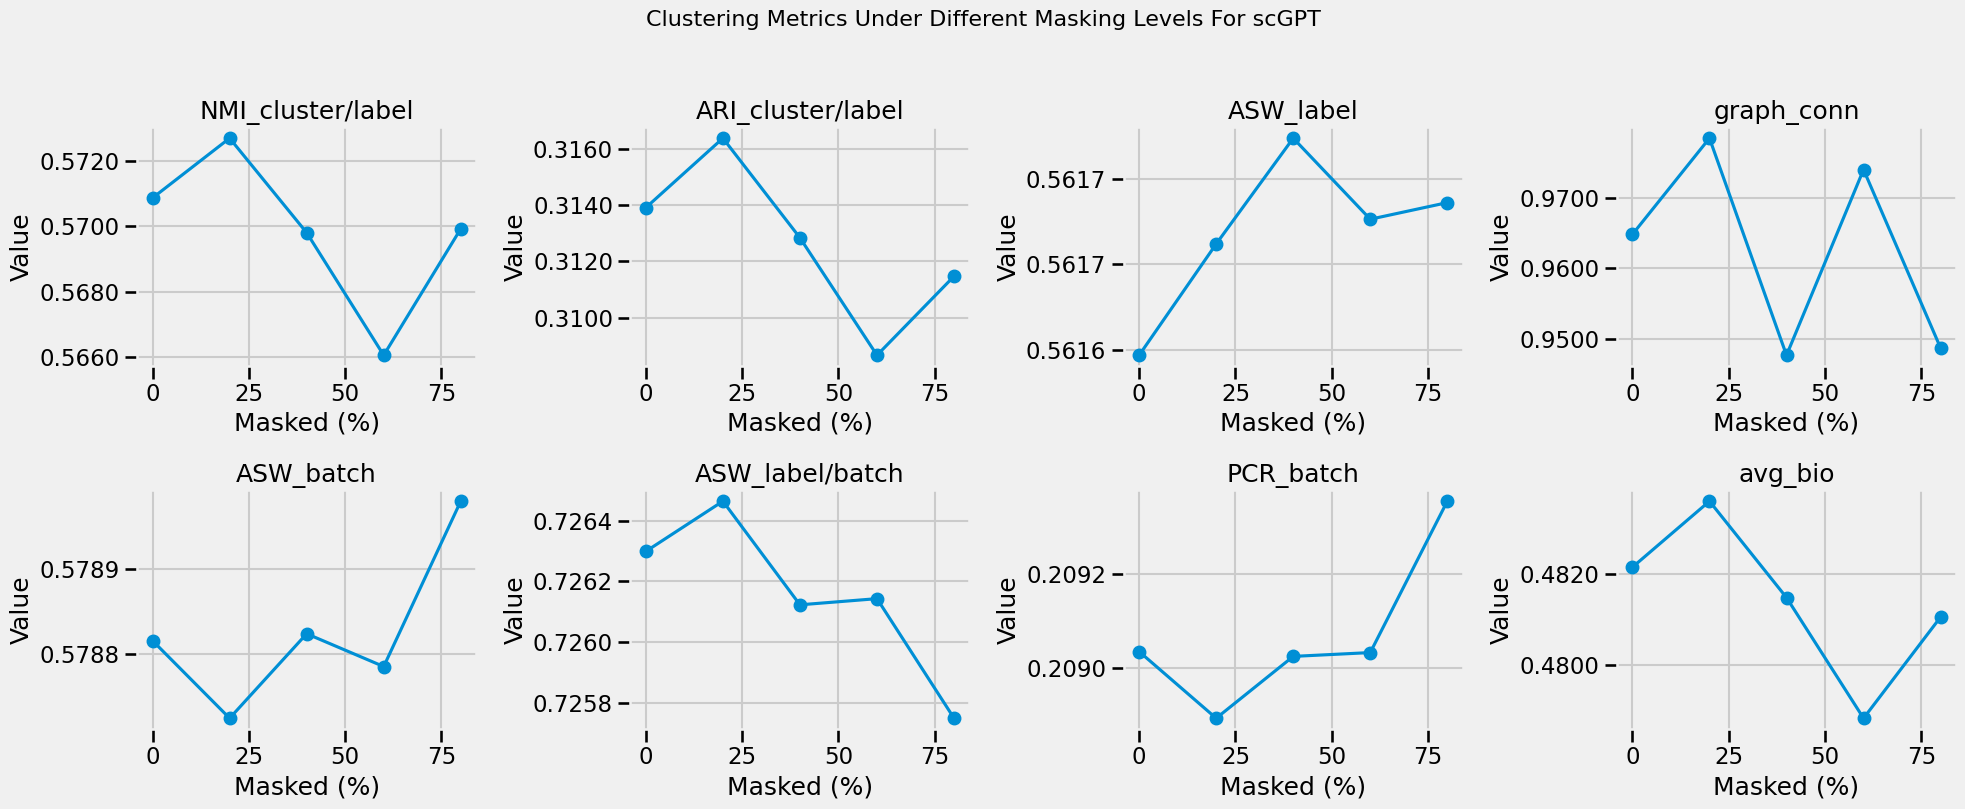

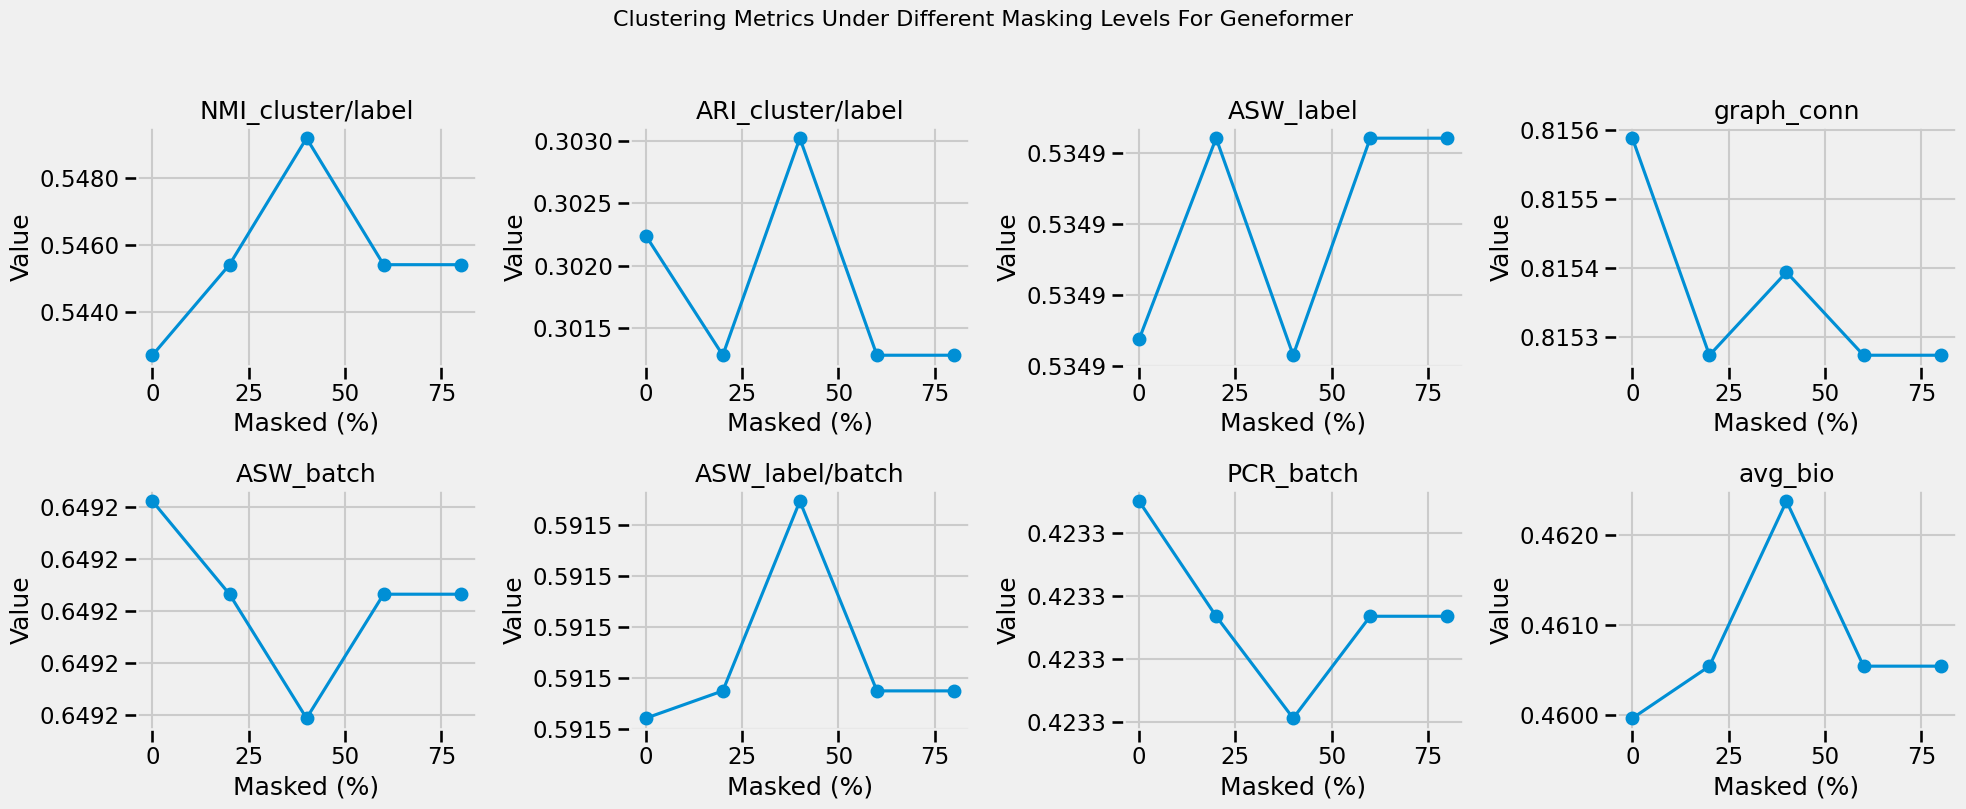

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import math

for model in {'scGPT', 'genePT-w', 'Geneformer'}:
    data_df = pd.DataFrame()
    # Read evaluation output
    def read_eval_output(filepath, masked_pct, df):
        masked_zero_metrics = pd.read_csv(filepath, index_col=False)
        masked_zero_metrics['masked_pct'] = masked_pct
        return pd.concat([df, masked_zero_metrics])
    def to_decimal(x, pos):
        return f'{x:.4f}'

    data_df=read_eval_output(f'../pbmc/eval/X_{model}__metrics.csv', masked_pct=0, df=data_df)
    data_df=read_eval_output(f'../pbmc_masked_20/eval/X_{model}__metrics.csv', masked_pct=20, df=data_df)
    data_df=read_eval_output(f'../pbmc_masked_40/eval/X_{model}__metrics.csv', masked_pct=40, df=data_df)
    data_df=read_eval_output(f'../pbmc_masked_60/eval/X_{model}__metrics.csv', masked_pct=60, df=data_df)
    data_df=read_eval_output(f'../pbmc_masked_80/eval/X_{model}__metrics.csv', masked_pct=80, df=data_df)

    metrics = data_df['metric'].unique()
    n_metrics = len(metrics)

    n_cols = 4
    n_rows = math.ceil(n_metrics / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

    for idx, metric in enumerate(metrics):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row][col]

        subset = data_df[data_df['metric'] == metric].sort_values(by='masked_pct')
        ax.plot(subset['masked_pct'], subset['value'], marker='o')
        ax.set_title(metric)
        ax.set_xlabel('Masked (%)')
        ax.set_ylabel('Value')
        ax.yaxis.set_major_formatter(FuncFormatter(to_decimal))
        ax.grid(True)

    for idx in range(n_metrics, n_rows * n_cols):
        fig.delaxes(axes[idx // n_cols][idx % n_cols])

    fig.suptitle(f'Clustering Metrics Under Different Masking Levels For {model}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

## Step 1: Evaluate Zero-shot Tasks After Masking Gene Expressions
### 80% Masked

In [6]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

metrics = []
# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_80/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_80/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=-1))

Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.211852
1  ARI_cluster/label  cell_type  0.042468
2          ASW_label  cell_type  0.239255
3         graph_conn  cell_type  0.746432
4          ASW_batch  cell_type  0.642910
5    ASW_label/batch  cell_type  0.450106
6          PCR_batch  cell_type  0.717521
7            avg_bio  cell_type  0.164525
Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.569925
1  ARI_cluster/label  cell_type  0.311474
2          ASW_label  cell_type  0.561736
3         graph_conn  cell_type  0.948728
4          ASW_batch  cell_type  0.578980
5    ASW_label/batch  cell_type  0.725748
6          PCR_batch  cell_type  0.209357
7            avg_bio  cell_type  0.481045
Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
  

Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 896)


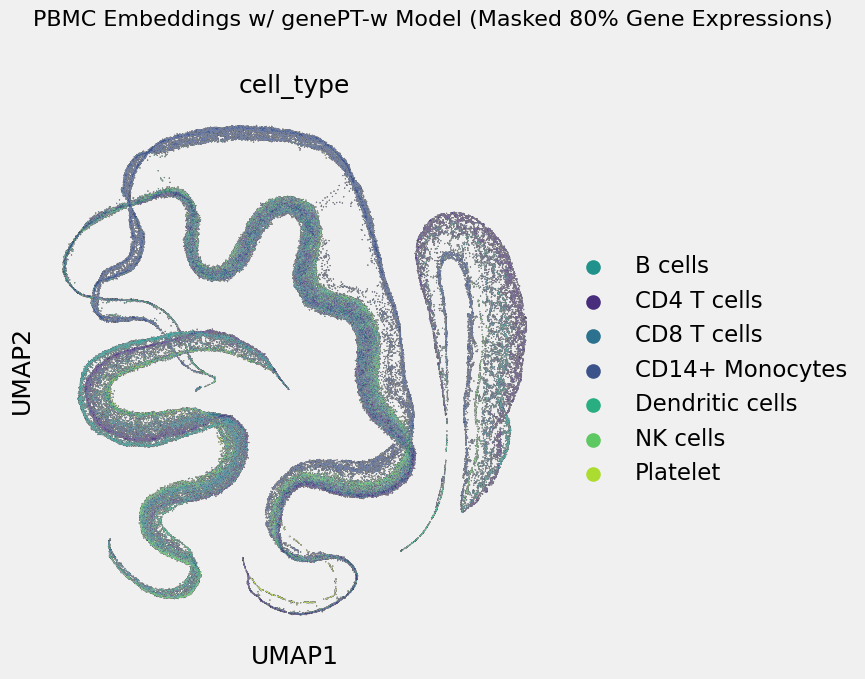

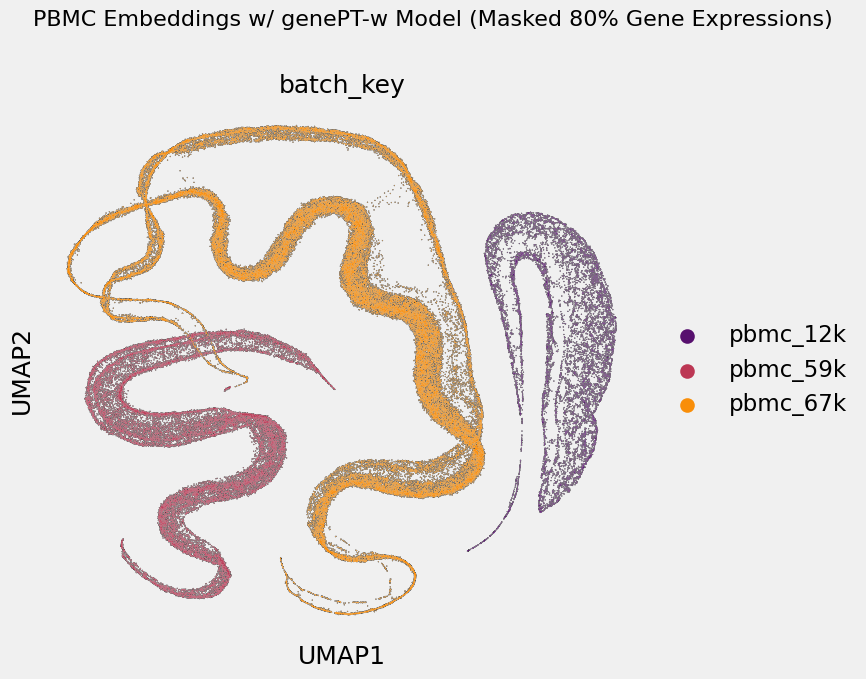

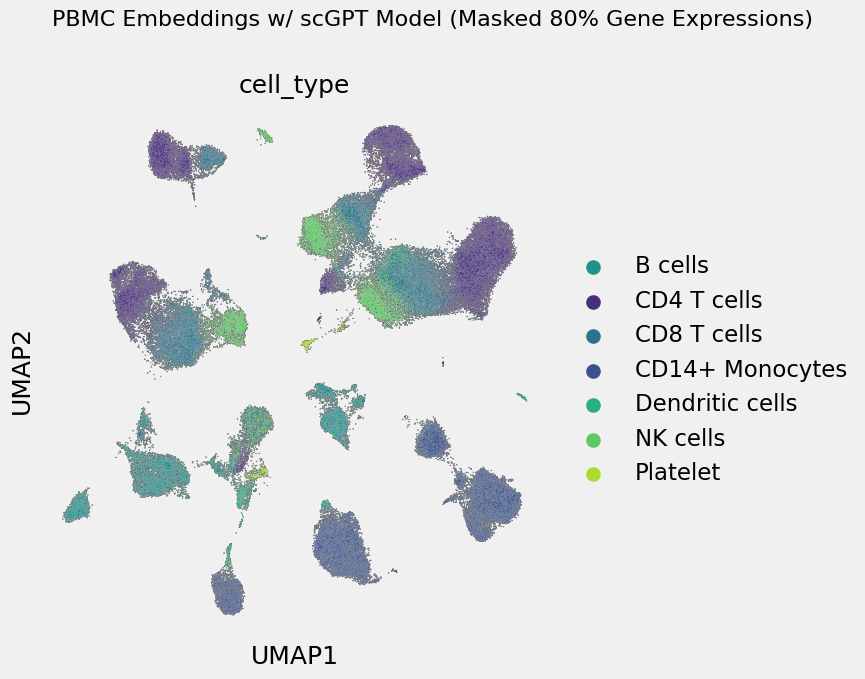

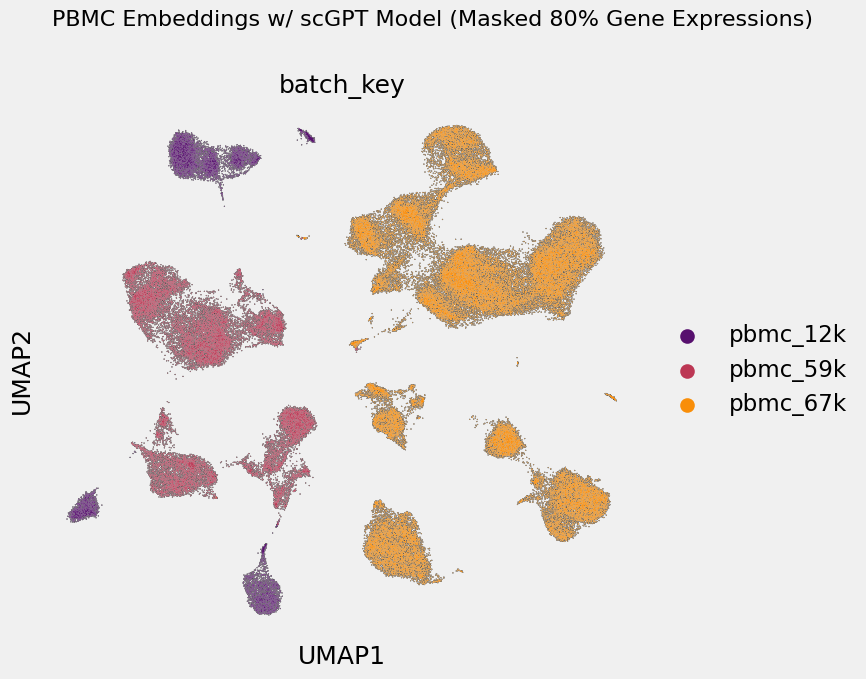

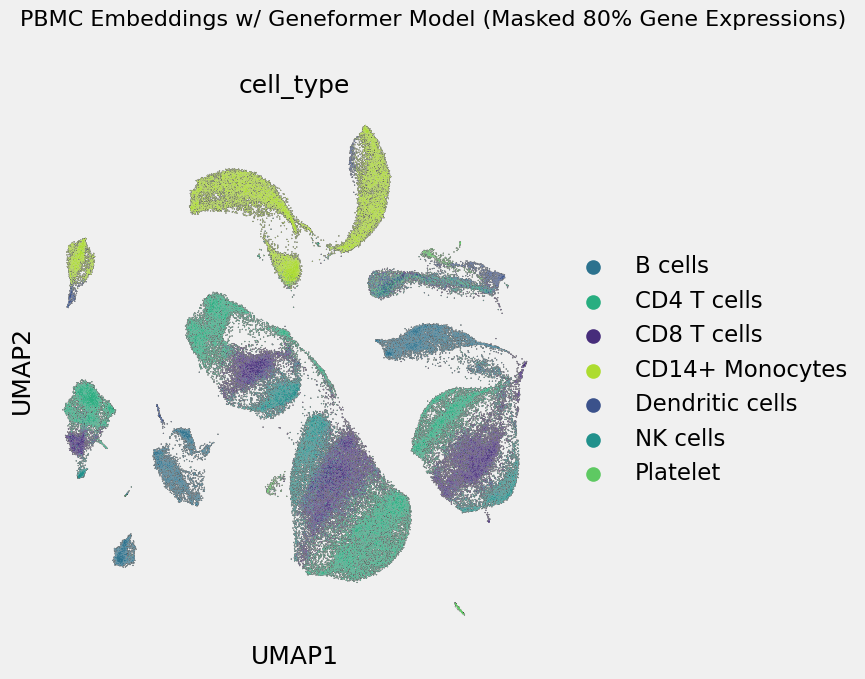

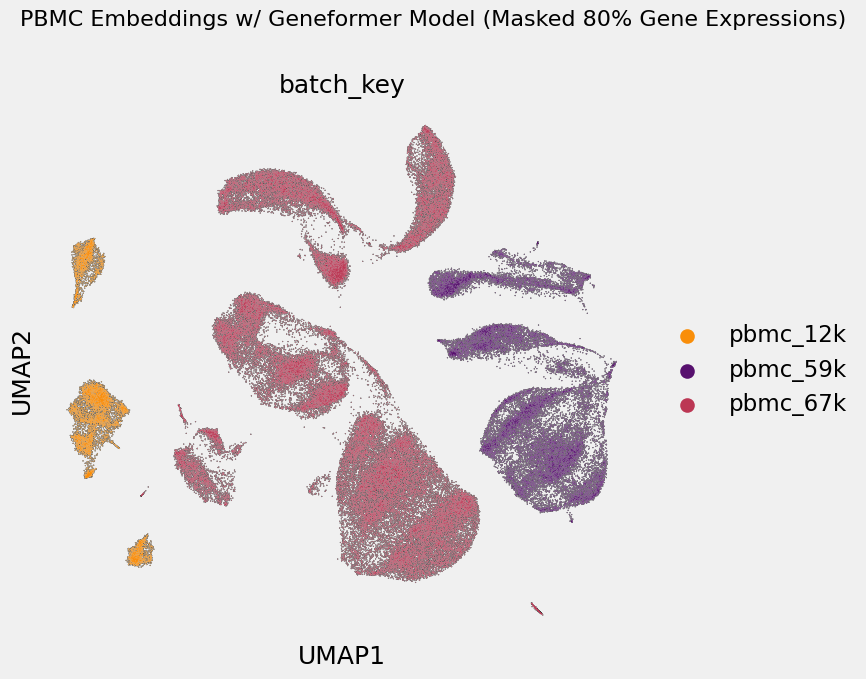

In [5]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_80/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_80/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Masked 80% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)

### 60% Masked

In [9]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 60% sampled gene expression.
for model in {"scGPT", "genePT-w"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_60/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_60/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=-1))

Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.205630
1  ARI_cluster/label  cell_type  0.037473
2          ASW_label  cell_type  0.239255
3         graph_conn  cell_type  0.746491
4          ASW_batch  cell_type  0.642910
5    ASW_label/batch  cell_type  0.450106
6          PCR_batch  cell_type  0.717521
7            avg_bio  cell_type  0.160786
Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.566059
1  ARI_cluster/label  cell_type  0.308667
2          ASW_label  cell_type  0.561726
3         graph_conn  cell_type  0.973976
4          ASW_batch  cell_type  0.578786
5    ASW_label/batch  cell_type  0.726143
6          PCR_batch  cell_type  0.209033
7            avg_bio  cell_type  0.478818


Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=X_scGPT).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}}
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
adata_ has 103526 cells. Taking a subset of 7500 cells.

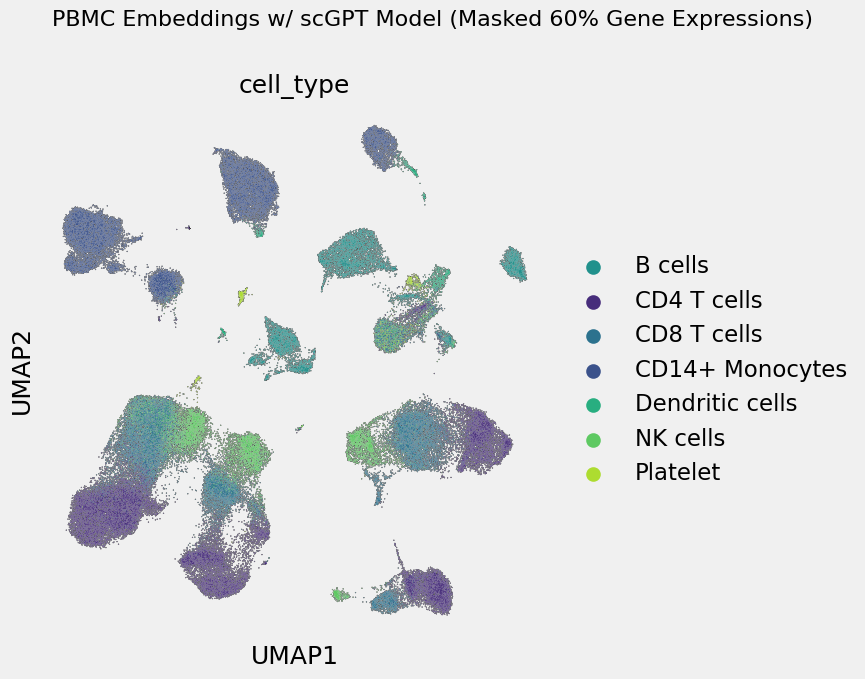

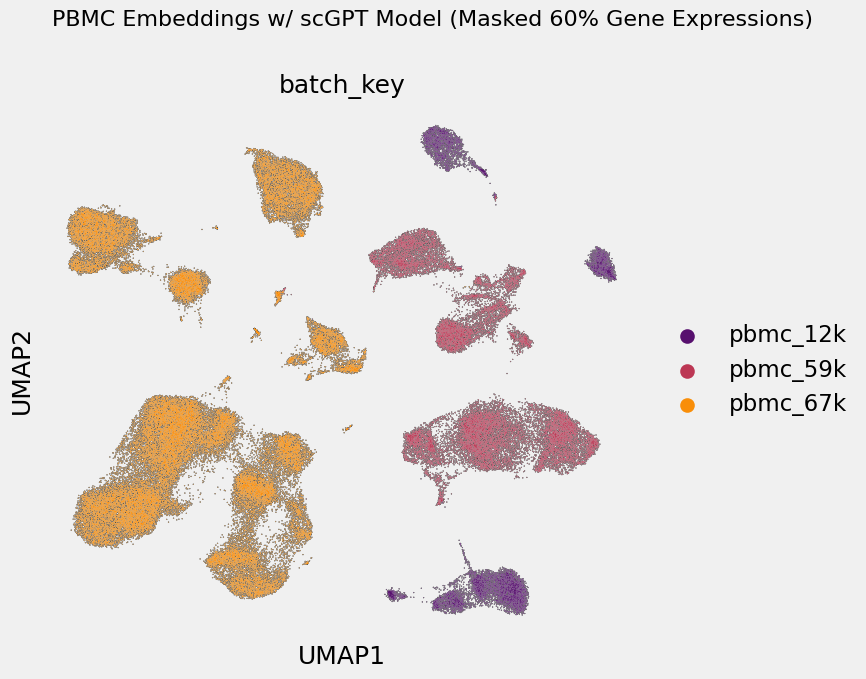

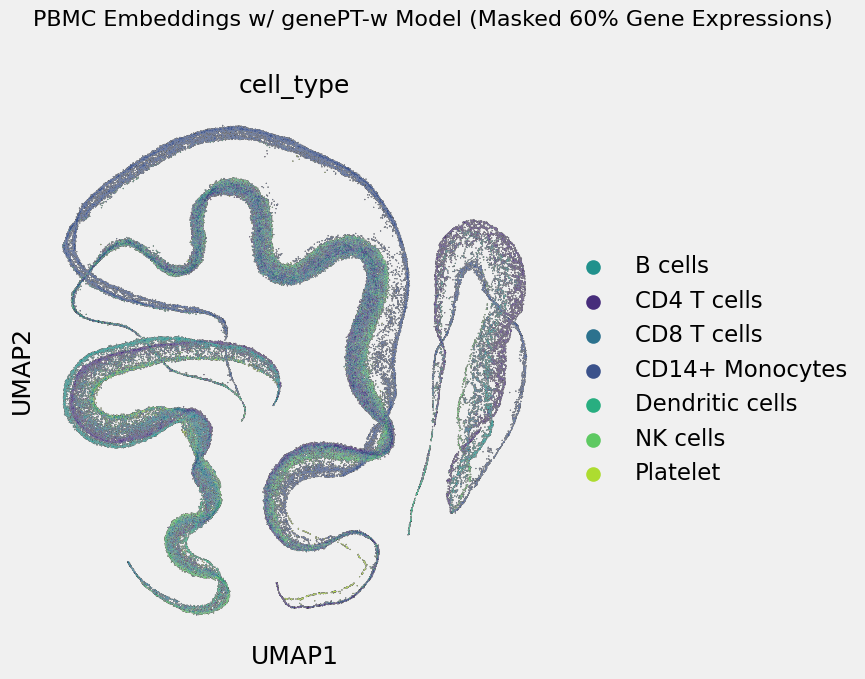

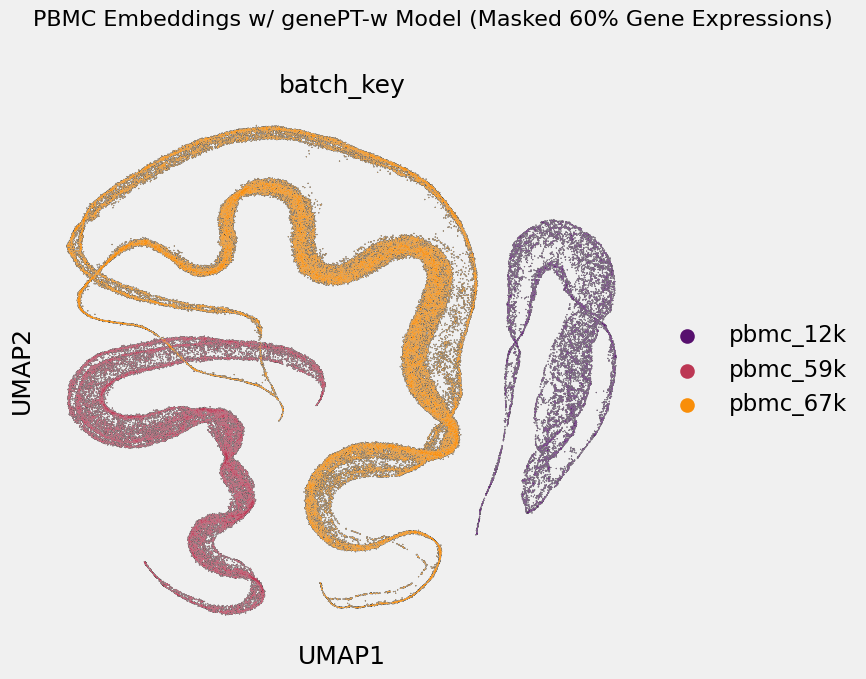

In [2]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 60% sampled gene expression.
for model in {"scGPT", "genePT-w"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_60/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_60/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Masked 60% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)

### 40% Masked

In [8]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_40/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_40/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=-1))

Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.208399
1  ARI_cluster/label  cell_type  0.039682
2          ASW_label  cell_type  0.239255
3         graph_conn  cell_type  0.749341
4          ASW_batch  cell_type  0.642910
5    ASW_label/batch  cell_type  0.450106
6          PCR_batch  cell_type  0.717521
7            avg_bio  cell_type  0.162445
Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.569806
1  ARI_cluster/label  cell_type  0.312840
2          ASW_label  cell_type  0.561774
3         graph_conn  cell_type  0.947702
4          ASW_batch  cell_type  0.578824
5    ASW_label/batch  cell_type  0.726123
6          PCR_batch  cell_type  0.209025
7            avg_bio  cell_type  0.481473


Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=X_scGPT).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scGPT'}}
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
adata_ has 103526 cells. Taking a subset of 7500 cells.

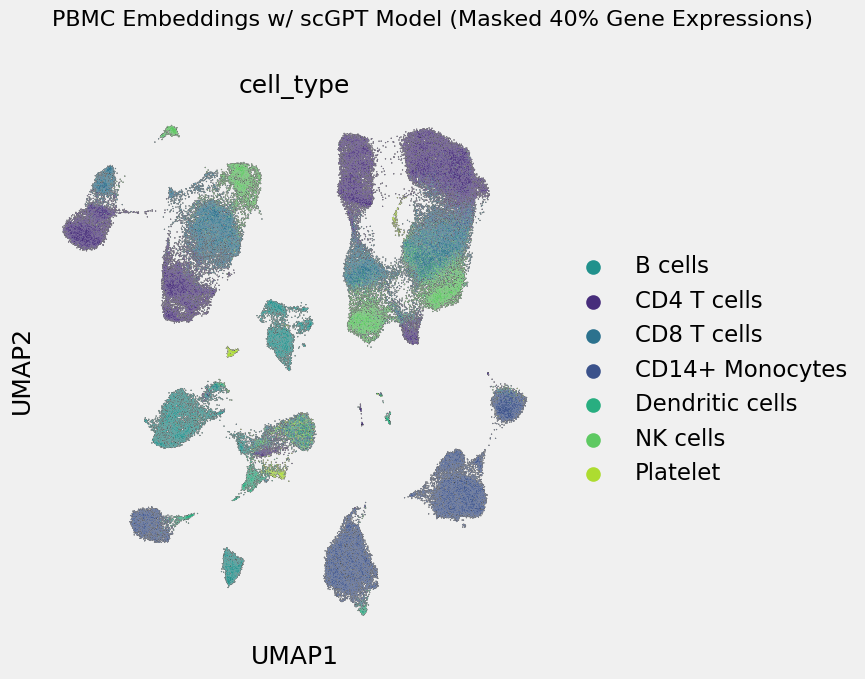

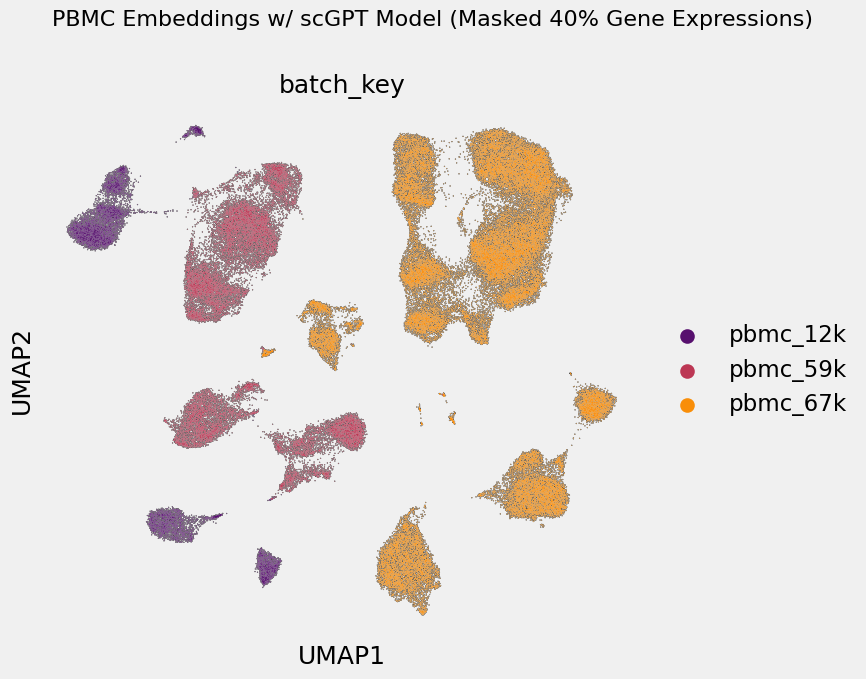

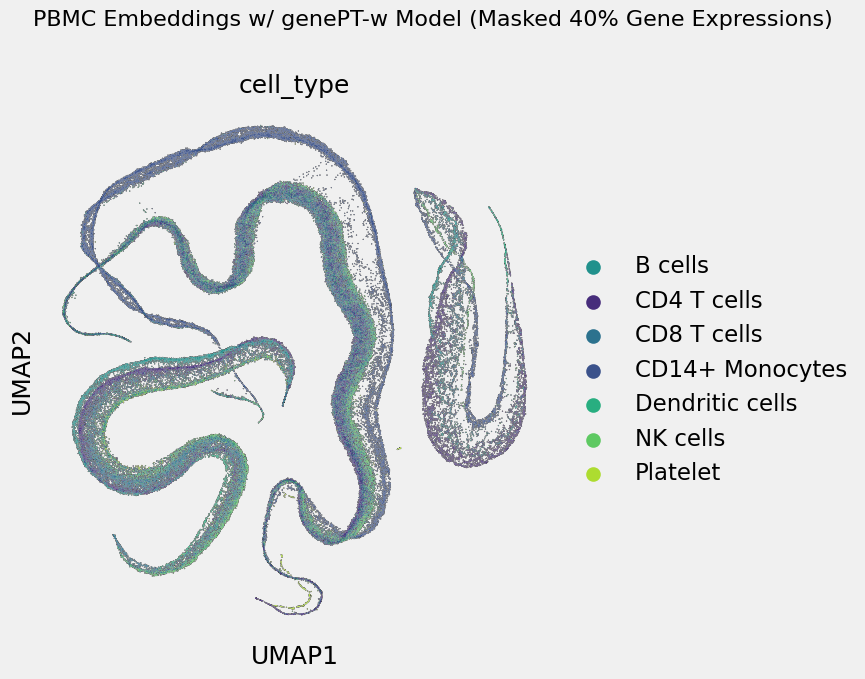

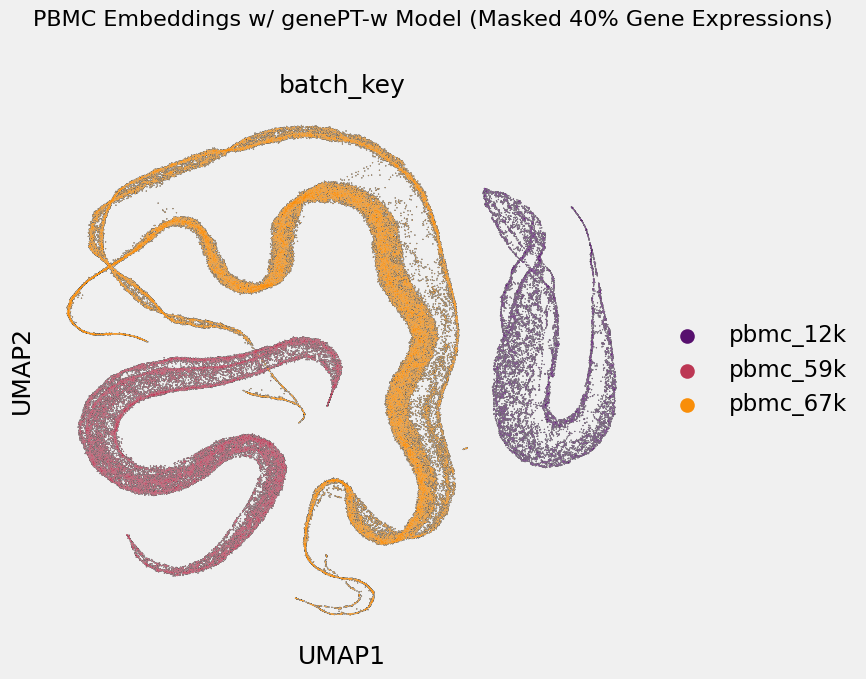

In [1]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

metrics = []
# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_40/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_40/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Masked 40% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)
    metrics.append(eval.evaluate(n_cells=7500))

print('\n')
for metric in metrics:
    print(metric)
    print('\n')

### 20% Masked

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 896)
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)


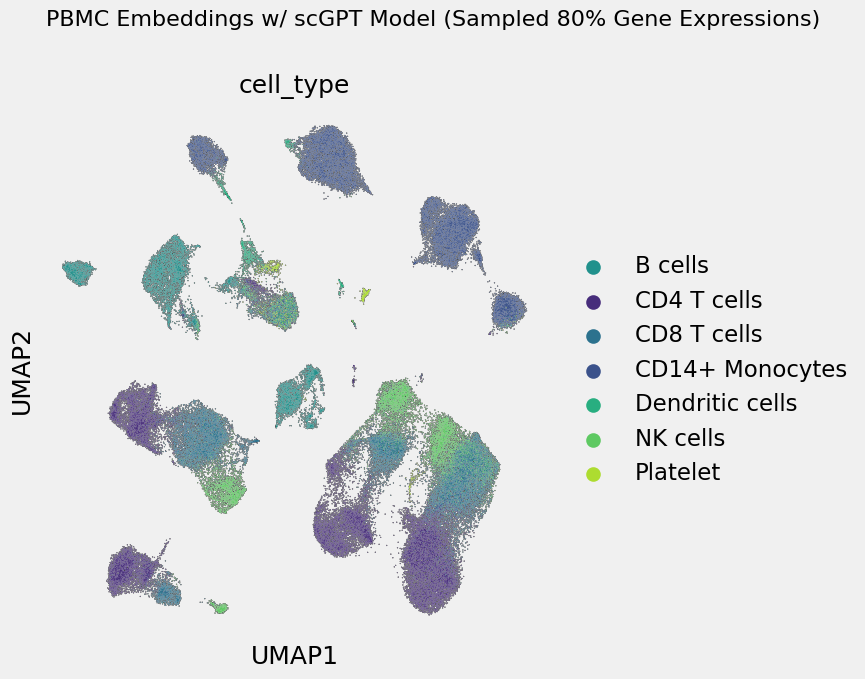

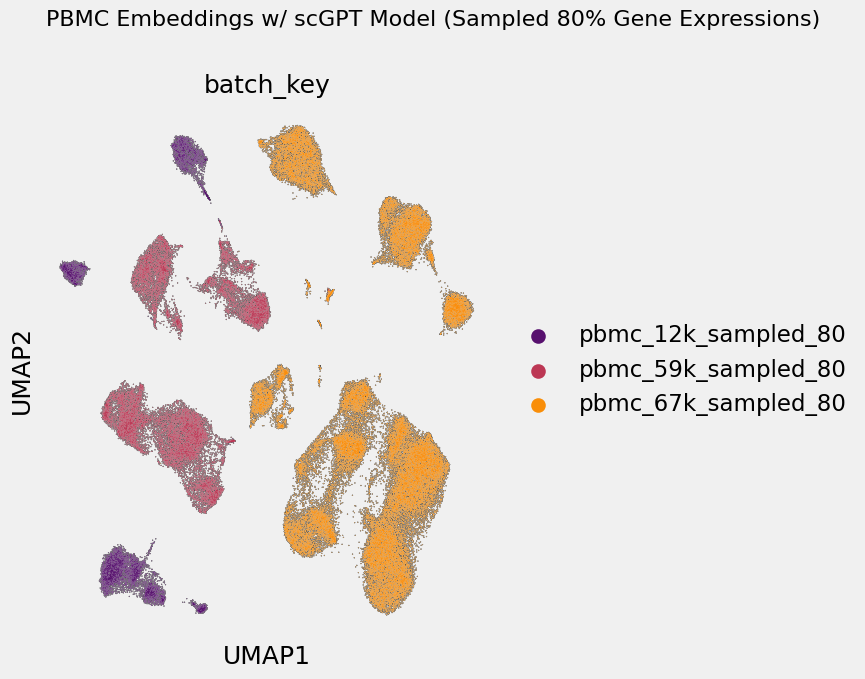

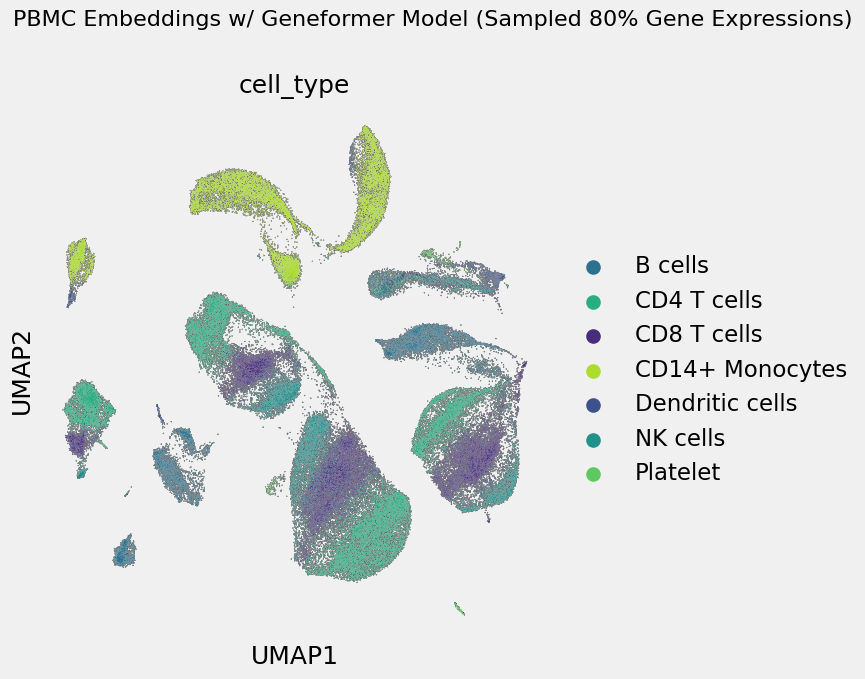

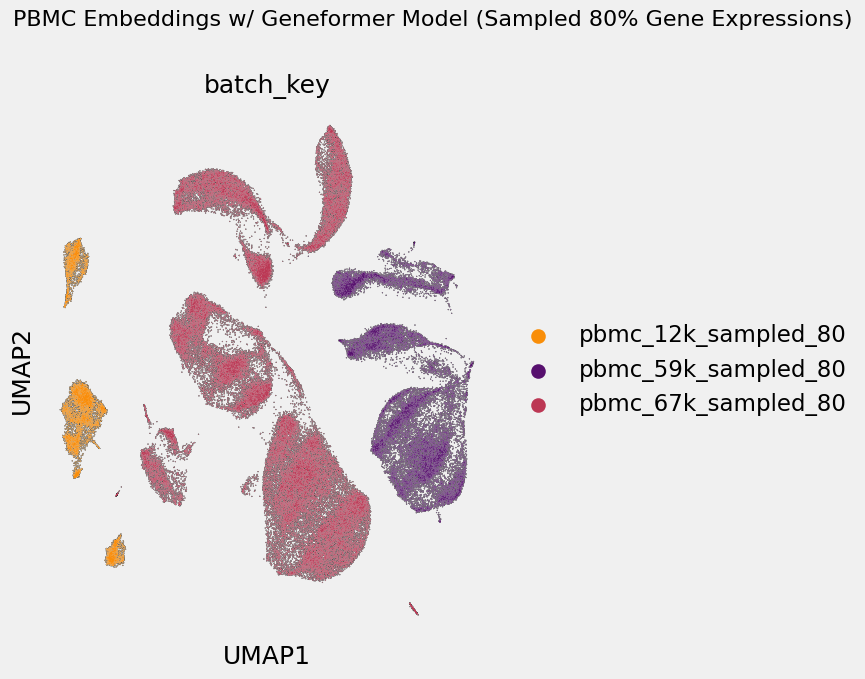

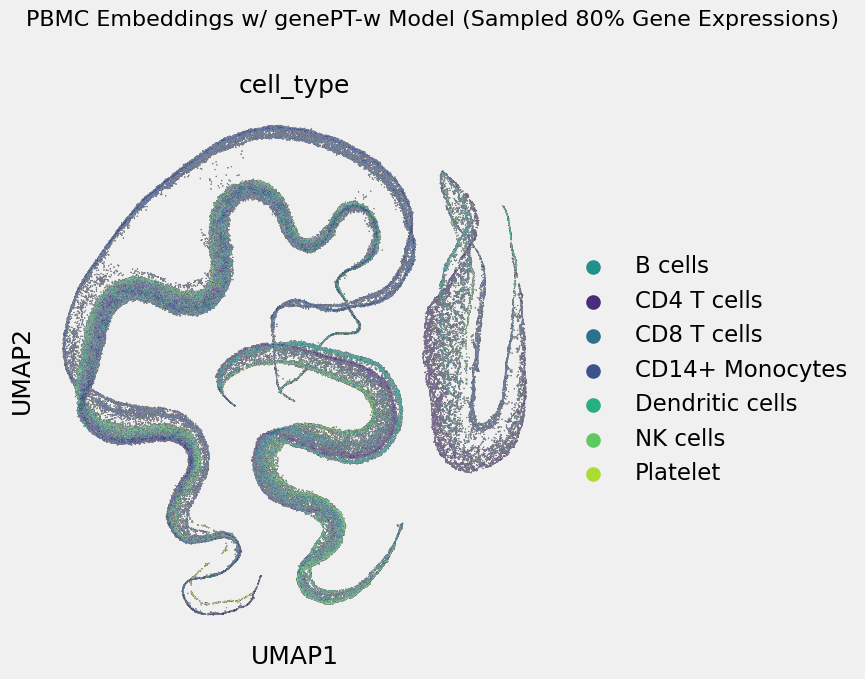

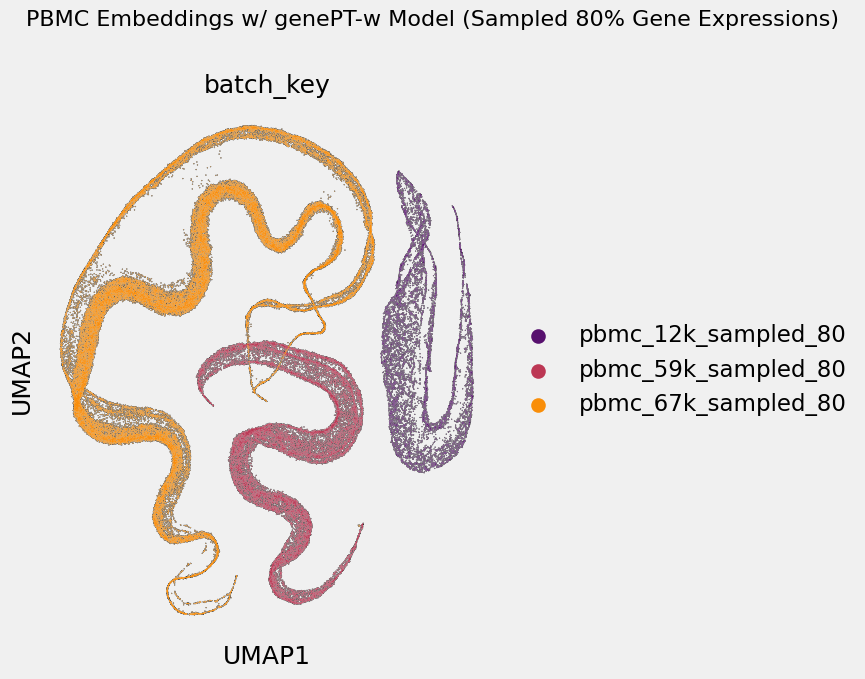

In [1]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc_sampled_80/sampled_{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc_sampled_80/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model (Sampled 80% Gene Expressions)",
                   plot_type='scanpy',
                   n_cells=-1)

In [2]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Evaluate cell labeling capability with 80% sampled gene expression.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc_masked_20/sampled_{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc_masked_20/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=7500))
    print('\n')

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
adata_ has 103526 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.563412
1  ARI_cluster/label  cell_type  0.308262
2          ASW_label  cell_type  0.561519
3         graph_conn  cell_type  0.887550
4          ASW_batch  cell_type  0.578507
5    ASW_label/batch  cell_type  0.730657
6          PCR_batch  cell_type  0.210987
7            avg_bio  cell_type  0.477731


Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
adata_ has 103526 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.514193
1  ARI_cluster/label  cell_type  0.289187
2          ASW_label  cell_type  0.531371
3         graph_conn  cell_type  0.759473
4          ASW_batch  cell_type  0.648709
5    ASW_label/batch  cell_type  0.593332
6          PCR_batch  cell_type  0.422381
7          

In [2]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Compare cell clusters with gene expressions and sampled gene expressions.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc_masked_20/sampled_{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc_masked_20/eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=-1))
    print('\n')

Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.209852
1  ARI_cluster/label  cell_type  0.040915
2          ASW_label  cell_type  0.239255
3         graph_conn  cell_type  0.749030
4          ASW_batch  cell_type  0.642910
5    ASW_label/batch  cell_type  0.450106
6          PCR_batch  cell_type  0.717521
7            avg_bio  cell_type  0.163341


Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.572696
1  ARI_cluster/label  cell_type  0.316379
2          ASW_label  cell_type  0.561712
3         graph_conn  cell_type  0.978429
4          ASW_batch  cell_type  0.578725
5    ASW_label/batch  cell_type  0.726465
6          PCR_batch  cell_type  0.208893
7            avg_bio  cell_type  0.483596


Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering